# Analyzing Physician Demand and Supply Gap

The purpose of this notebook is to analyze the Physician supply and demand gap per region.

- The pre-processing of physician demand data is found on `09_Physician_Demand_Modeling_FINAL.ipynb`

- The pre-processing of physician supply data is found `10_Supply_Forecast_Final_Notebook.ipynb`


This notebook includes visualization and maps. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-usi05vow because the default path (/home/jjayme/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# Get Demand, Supply and Population Data

In [2]:
df_demand = pd.read_csv('~/cpt5/capstone/data/processed/2010-30_demand_'
                        'forecast.csv')
df_supply = pd.read_csv('~/cpt5/capstone/data/processed/2010-30_regional_'
                        'supply_forecasts_final.csv')
df_population = pd.read_csv('~/cpt5/capstone/data/processed/2010-30_PSA_'
                            'regional_population.csv')

## Get 2030 Physician Demand & Supply Gap

In [3]:
df_dem30 = df_demand[df_demand['year']==2030][['Region', 'PD']]
df_sup30 = df_supply[df_supply['Year'] == 2030][['Region',
                                                 'Final_Supply_per_10k']]

#merge dataset
df = df_dem30.merge(df_sup30)
df

,Region,PD,Final_Supply_per_10k
0,NCR,21.792683,8.717956
1,CAR,17.391312,4.089980
2,I - Ilocos,18.076968,2.590079
3,II - Cagayan,17.660045,2.165469
4,III - C. Luzon,20.405952,2.447676
5,IVA - Calabarzon,19.443190,1.914967
6,MIMAROPA,11.895495,1.091297
7,V - Bicol,12.140647,1.394846
8,VI - W. Visayas,17.725471,2.166419
9,VII - C. Visayas,17.320264,2.348328


In [4]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
         'tab:brown', 'tab:pink', 'indigo', 'tab:olive', 'tab:cyan',
         'darkmagenta', 'maroon', 'lime', 'darkolivegreen', 'cadetblue',
         'darkgoldenrod', 'fuchsia']

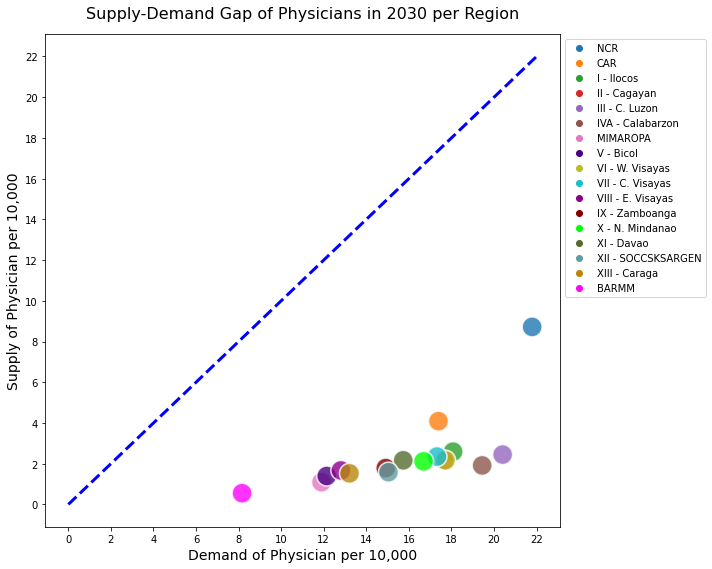

In [5]:
plt.figure(figsize=(10,8))
palette = sns.color_palette("Paired")
sns.scatterplot(df['PD'], df['Final_Supply_per_10k'],alpha=0.8, s=400, 
                hue=df['Region'], palette=colors)

plt.plot(np.arange(0,24,2), np.arange(0,24,2), 'b--', lw=3)
plt.xticks(np.arange(0,24,2))
plt.yticks(np.arange(0,24,2))
plt.ylabel('Supply of Physician per 10,000', fontsize=14)
plt.xlabel('Demand of Physician per 10,000', fontsize=14)
plt.legend(bbox_to_anchor=(1,1))
plt.title('Supply-Demand Gap of Physicians in 2030 per Region', fontsize=16,
          y=1.02)
plt.tight_layout()
plt.savefig('supply-demand_gap.png', dpi=300);

## Get the Gap 

In [6]:
df['PD'] = df['PD'].round(2)
df['Final_Supply_per_10k'] = df['Final_Supply_per_10k'].round(2)
df['gap'] = df['PD'] - df['Final_Supply_per_10k']

In [7]:
# sort the gap
df.sort_values(by='gap', ascending=False, inplace=True)
df

,Region,PD,Final_Supply_per_10k,gap
4,III - C. Luzon,20.41,2.45,17.96
5,IVA - Calabarzon,19.44,1.91,17.53
8,VI - W. Visayas,17.73,2.17,15.56
3,II - Cagayan,17.66,2.17,15.49
2,I - Ilocos,18.08,2.59,15.49
9,VII - C. Visayas,17.32,2.35,14.97
12,X - N. Mindanao,16.69,2.12,14.57
13,XI - Davao,15.73,2.17,13.56
14,XII - SOCCSKSARGEN,15.04,1.58,13.46
1,CAR,17.39,4.09,13.30


# Visualize the Physician demand 2022-2030

In [8]:
df_x = df_demand[df_demand['year'] > 2021]

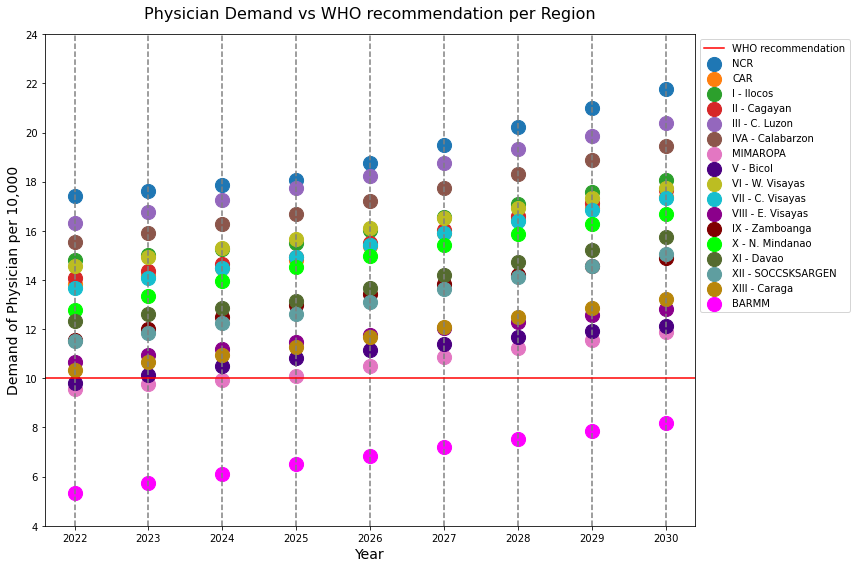

In [9]:
plt.figure(figsize=(12,8))
xposition = np.arange(2022,2031,1)
for xc in xposition:
    plt.axvline(x=xc, color='grey', linestyle='--')
plt.axhline(y=10, color='r', linestyle='-', label='WHO recommendation')

for i,reg in enumerate(df_x['Region'].unique()):
    df_y = df_x[df_x['Region']==reg]
    plt.scatter(df_y['year'], df_y['PD'],color=colors[i], label=reg, s=200)

plt.yticks(np.arange(4,26,2))
plt.title('Physician Demand vs WHO recommendation per Region', fontsize=16, y=1.02)
plt.ylabel('Demand of Physician per 10,000', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig('demand_vs_WHO.png', dpi=300);

# Get the Actual Supply Physician counts

In [10]:
# get the raw counts of supply of physicians
df_sup = df_supply[['Year', 'Region', 'Combined_Actual_and_Forecast']]
df_sup.columns = ['year', 'Region', 'PD_supply_counts']
df_sup.head()

,year,Region,PD_supply_counts
0,2010,BARMM,61.0
1,2011,BARMM,60.0
2,2012,BARMM,59.0
3,2013,BARMM,61.0
4,2014,BARMM,68.0


# Get the Demand Physician counts

In [11]:
# clean dataset
df_population.drop(columns=['Unnamed: 0'], inplace=True)
df_population.columns = ['Region', 'year', 'population']

In [12]:
df_demand.drop(columns=['population'], inplace=True)

In [13]:
# merge population and demand data
df_demand = df_demand.merge(df_population, on=['Region', 'year'])

In [14]:
# compute actual physician demand counts
df_demand['PD_demand_counts'] = df_demand.apply(lambda x: (x['PD']*
                                             x['population'])/10_000, axis=1)

# Analyze the National Gap

In [15]:
df_raw = df_demand[['year', 'Region', 'PD_demand_counts']].merge(df_sup, on=['year', 'Region'])

In [16]:
dem_sum = df_raw.groupby('year')[['PD_demand_counts']].sum().round().reset_index()
supp_sum = df_raw.groupby('year')[['PD_supply_counts']].sum().reset_index()

## National Gap in Raw counts

In [17]:
df = dem_sum.merge(supp_sum)
df_ = df[df['year'] > 2021]

In [18]:
df_

,year,PD_demand_counts,PD_supply_counts
12,2022,152990.0,26581.0
13,2023,158703.0,27474.0
14,2024,164500.0,28369.0
15,2025,170350.0,29250.0
16,2026,178674.0,30242.0
17,2027,187117.0,31230.0
18,2028,195677.0,32219.0
19,2029,204349.0,33209.0
20,2030,213133.0,34200.0


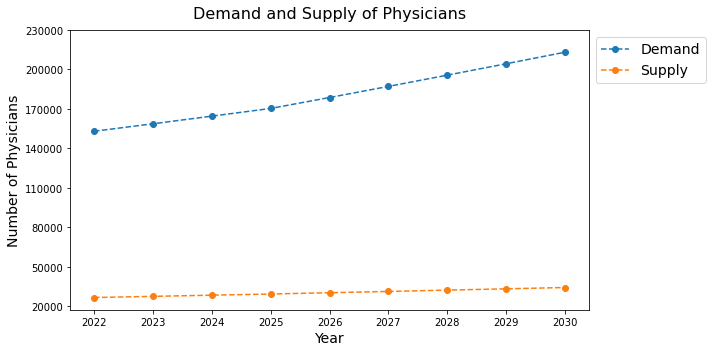

In [19]:
plt.figure(figsize=(10,5))

plt.plot(df_['year'], df_['PD_demand_counts'], 'o--', label='Demand')
plt.plot(df_['year'], df_['PD_supply_counts'], 'o--', label='Supply')

plt.title('Demand and Supply of Physicians', fontsize=16, y=1.02)
plt.ylabel('Number of Physicians', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.yticks(np.arange(20_000, 250_000, 30_000))
plt.tight_layout()
plt.legend(bbox_to_anchor=(1,1), fontsize=14)
plt.tight_layout()
plt.savefig('demand_vs_supply.png', dpi=300);

## National Gap per 10,000

In [20]:
pop = pd.DataFrame(df_demand.groupby('year')['population'].sum()).reset_index()

In [21]:
df = df.merge(pop, on='year')
df

,year,PD_demand_counts,PD_supply_counts,population
0,2010,89302.0,16779.0,93135100.0
1,2011,94258.0,18395.0,94674754.2
2,2012,99301.0,23776.0,96214408.4
3,2013,104430.0,25437.0,97754062.6
4,2014,109643.0,25865.0,99293716.8
5,2015,114938.0,34135.0,100833371.0
6,2016,120129.0,35391.0,102530196.0
7,2017,125403.0,37082.0,104169230.0
8,2018,130772.0,24791.0,105755180.0
9,2019,136231.0,24786.0,107288150.0


In [22]:
df['PD_demand'] = (df['PD_demand_counts']/df['population'])*10_000
df['PD_supply'] = (df['PD_supply_counts']/df['population'])*10_000

In [23]:
df['gap'] = df.PD_demand-df.PD_supply

In [24]:
df_ = df[df['year'] > 2019]
df_

,year,PD_demand_counts,PD_supply_counts,population,PD_demand,PD_supply,gap
10,2020,141791.0,24786.0,108771978.0,13.035618,2.278712,10.756907
11,2021,147352.0,25680.0,110198654.0,13.371488,2.330337,11.041151
12,2022,152990.0,26581.0,111572254.0,13.712190,2.382402,11.329788
13,2023,158703.0,27474.0,112892781.0,14.057852,2.433637,11.624215
14,2024,164500.0,28369.0,114163719.0,14.409131,2.484940,11.924191
15,2025,170350.0,29250.0,115377992.0,14.764514,2.535146,12.229369
16,2026,178674.0,30242.0,117369893.6,15.223154,2.576640,12.646514
17,2027,187117.0,31230.0,119361795.2,15.676457,2.616415,13.060042
18,2028,195677.0,32219.0,121353696.8,16.124519,2.654967,13.469553
19,2029,204349.0,33209.0,123345598.4,16.567190,2.692354,13.874836


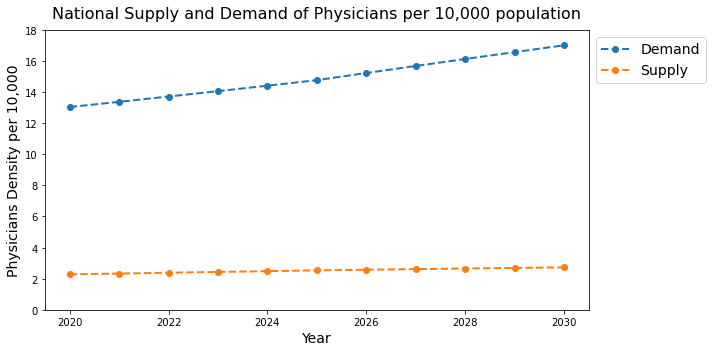

In [25]:
plt.figure(figsize=(10,5))

plt.plot(df_['year'], df_['PD_demand'], 'o--', label='Demand', lw=2)
plt.plot(df_['year'], df_['PD_supply'], 'o--', label='Supply', lw=2)

plt.title('National Supply and Demand of Physicians per 10,000 population', fontsize=16, y=1.02)
plt.ylabel('Physicians Density per 10,000', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.yticks(np.arange(0, 20, 2))
plt.legend(bbox_to_anchor=(1,1), fontsize=14)
plt.tight_layout()
plt.savefig('demand_vs_supply_PD.png', dpi=300);

In [28]:
df_

,year,PD_demand_counts,PD_supply_counts,population,PD_demand,PD_supply,gap
10,2020,141791.0,24786.0,108771978.0,13.035618,2.278712,10.756907
11,2021,147352.0,25680.0,110198654.0,13.371488,2.330337,11.041151
12,2022,152990.0,26581.0,111572254.0,13.712190,2.382402,11.329788
13,2023,158703.0,27474.0,112892781.0,14.057852,2.433637,11.624215
14,2024,164500.0,28369.0,114163719.0,14.409131,2.484940,11.924191
15,2025,170350.0,29250.0,115377992.0,14.764514,2.535146,12.229369
16,2026,178674.0,30242.0,117369893.6,15.223154,2.576640,12.646514
17,2027,187117.0,31230.0,119361795.2,15.676457,2.616415,13.060042
18,2028,195677.0,32219.0,121353696.8,16.124519,2.654967,13.469553
19,2029,204349.0,33209.0,123345598.4,16.567190,2.692354,13.874836
